# Data Mining Final Project 

## Group E:

#### Mudasir Wazir: #U79077374
#### Harish Rao Yadagiri: #U15115427
#### Nikhil Alla: #U58683362
#### Sai Ramakanth Kodi: #U06591564


### Bank Marketing 


###### Abstract:

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

###### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required, to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The data covers the period from May 2008 to November 2010.

The dataset consists of four versions, with varying numbers of examples and inputs:

We will be using the “bank-full.csv” (All Examples, Older Version) 
•	Number of Examples: 41,188 
•	Number of Inputs: 17 
•	Older version with fewer inputs 

### Objective:

This project's main goal is to create a predictive model that can accurately forecast whether a client will sign up for a term deposit or not. 

#### Business Questions:

"What are the key factors influencing a client's decision to subscribe to a term deposit, and how can we optimize our marketing strategies to increase the subscription rate based on these insights?"



"Which of our past marketing campaigns were most effective, and what can we learn from them to improve future campaigns?"


### Attribute Information:

###### Bank client data:

•	Age (Numeric):Represents the age of the client. 

•	Job (Categorical): Describes the type of job the client has, with categories such as "admin," "unknown," "unemployed," "management," and more. 

•	Marital (Categorical): Indicates the marital status of the client, with categories "married," "divorced," and "single." Note that "divorced" also includes widowed clients.

•	Education (Categorical): Represents the education level of the client, with categories like "unknown," "secondary," "primary," and "tertiary." 

•	Default (Binary): Indicates whether the client has credit in default. It's binary, with values "yes" or "no." 

•	Balance (Numeric): This numeric attribute represents the average yearly balance in euros. 

•	Housing (Binary): Describes whether the client has a housing loan. It's binary, with values "yes" or "no." 

•	Loan (Binary): Indicates whether the client has a personal loan. Also binary, with values "yes" or "no." 

###### Related with the last contact of the current campaign:

•	Contact (Categorical): Represents the communication type used for the last contact with the client. Categories include "unknown," "telephone," and "cellular." 

•	Day (Numeric): The day of the month when the last contact was made. 

•	Month (Categorical): Represents the month of the year when the last contact occurred. It has categories like "jan," "feb," and so on, covering the months. 

•	Duration (Numeric): The duration of the last contact in seconds, a numeric value. 

###### Other attributes:

•	Campaign (Numeric): Indicates the number of contacts performed during the current campaign for this client. It's a numeric value that includes the last contact. 

•	Pdays (Numeric): The number of days that passed after the client was last contacted from a previous campaign. A value of -1 indicates that the client was not previously contacted. 

•	Previous (Numeric): Stands for the number of contacts performed before the current campaign and for this client. 

•	Poutcome (Categorical): Describes the outcome of the previous marketing campaign. Categories include "unknown," "other," "failure," and "success."

###### Output variable (desired target):

•	y: has the client subscribed to a term deposit? (binary: 'yes', 'no')

### Analysis Plan:

Our analyses will include Data preprocessing, Exploratory Data Analysis, Feature engineering, Model selection, and Performance evaluation. 
To make sure the model works well, its performance will be assessed using several measures, including accuracy, precision, recall, F1-score, and ROC-AUC.
Since we are dealing with binary response variables, we will use the below ML models:
•	Logistic Regression
•	KNN
•	Decision Tree
•	Random Forest
•	Gradient Boosting Machines (e.g., XGBoost)

Further, we will perform hyperparameter tuning to optimize our models. And summarize findings in a clear, actionable report or presentation. 
We will finally give actionable business implications from this analysis. 



In [2]:
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data into jupyter.

In [3]:
df = pd.read_csv(r"C:\Users\mudas\OneDrive\Desktop\Data Mining\final project\bank-full.csv",sep = ';')

## Viewing the data to check for quality, missing values,duplicate values.

In [4]:
df.shape 

(45211, 17)

The data has 45211 observations and 17 features

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# understanding the total observations, columns and datatype
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#renaming the target column to subscribed for easy understanding

df = df.rename(columns={'y': 'subscribed'})

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [10]:
#Checking the summary stats of the data and including objects to chekc unique values. 

df.describe(include='all').transpose() 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


The dataset includes 17 features with 7 numerical variables and 10 categorical variables.

No duplicate data was found.

No null values were found, but there are a few features that contain unknowns so we will check for them later.

The summary statistics reveal the presence of outliers in data in some featured which we will address later. 


## Exploratory Data Analysis

### Distribution of Numerical Variables

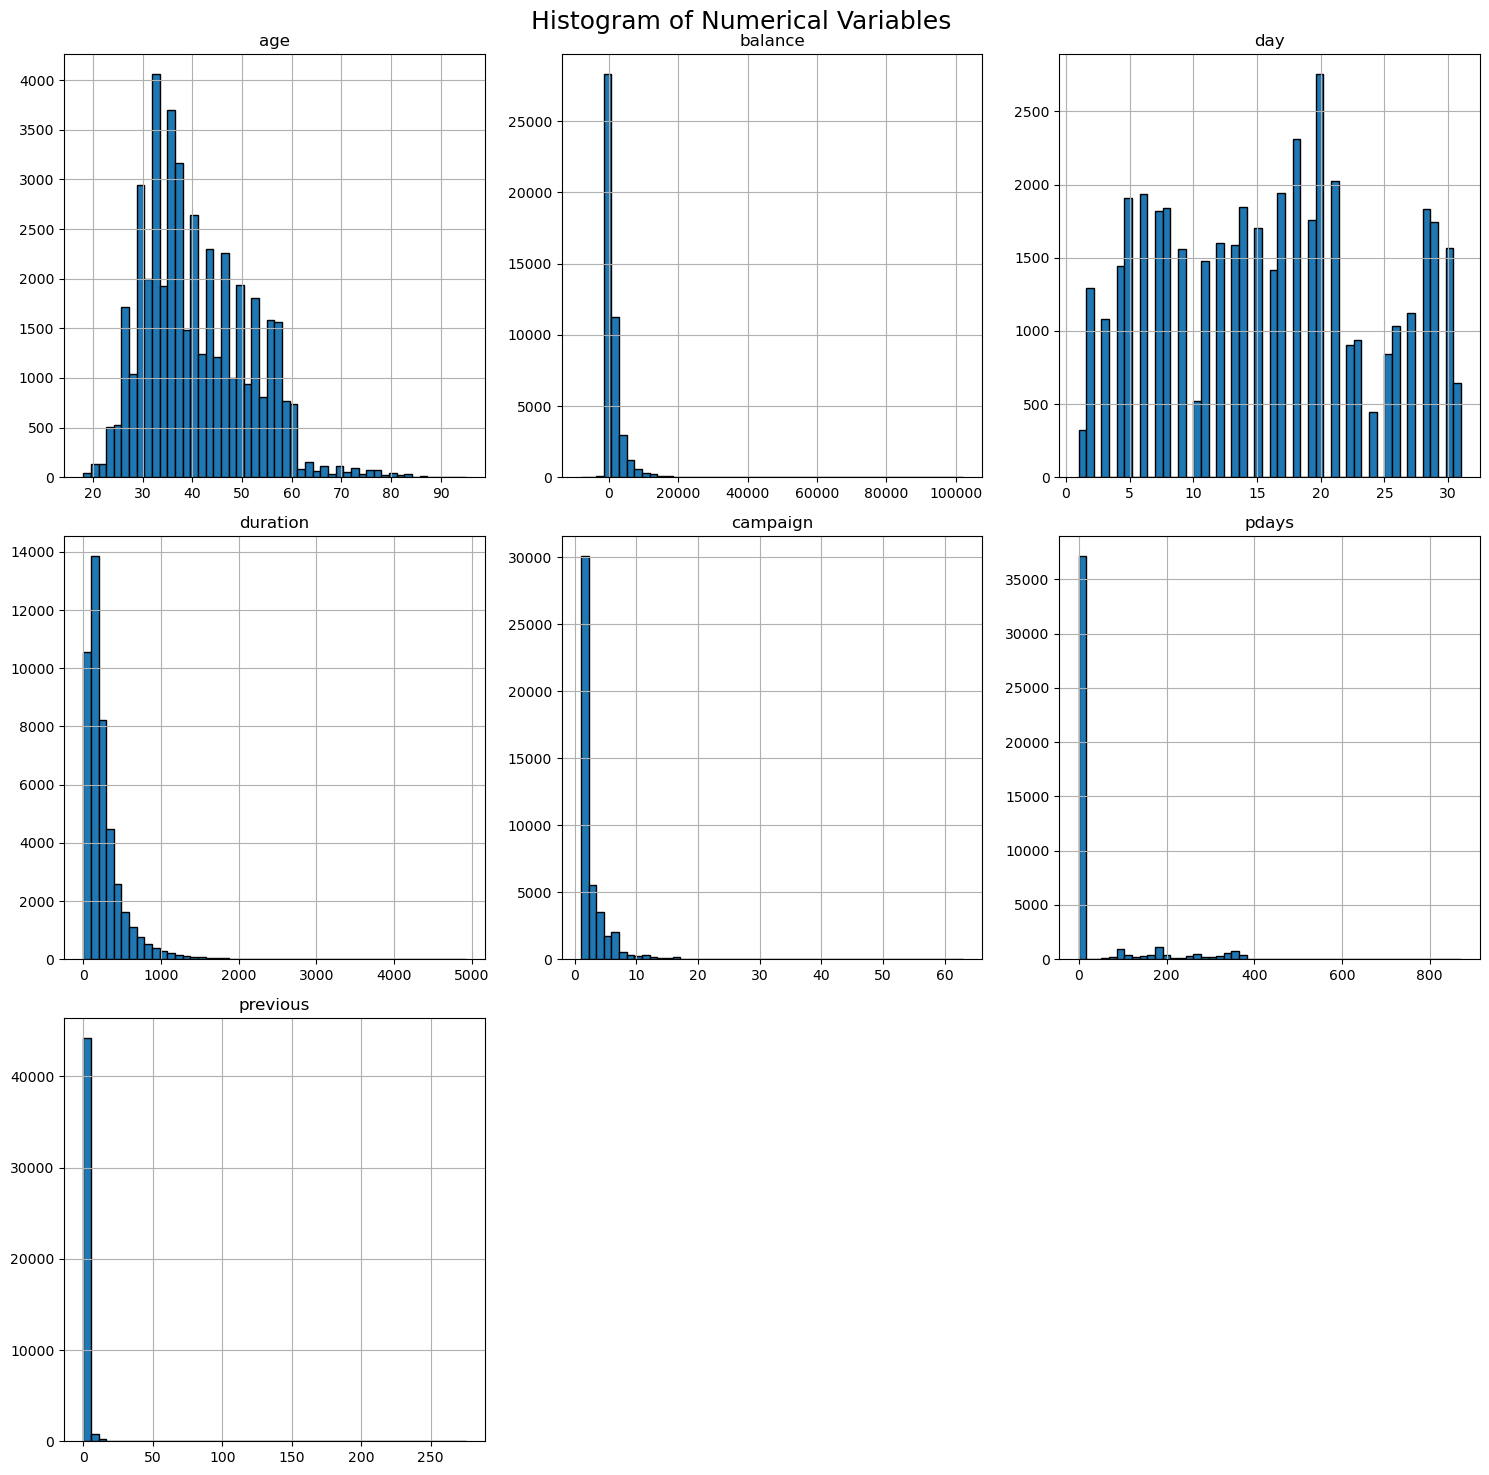

In [11]:
#plotting the histogram of numerical variables to check their distribution.

df.hist(figsize=(15, 15),bins=50, edgecolor='black')
plt.suptitle('Histogram of Numerical Variables ', fontsize=18)
plt.tight_layout()
plt.show()

##### Age
Most customers seem to be from the 30 - 45 age group.

The Age distribution highlights the need to adjust marketing tactics to appeal to middle-aged consumers, who are an ideal target market for term deposit subscription campaigns. It also acknowledges the challenges associated with reaching the youngest and oldest age groups in the population.

Younger People: This could be due to a number of things, including younger people's poorer investment awareness and restricted financial capacity.

Older Age: Older people may already have made financial decisions, or they may be more conservative due to retirement and fixed incomes, which restrict interest or accessibility among the elderly population.

These extreme age groups may not be efficiently reached or resonated with marketing methods, necessitating customized approaches.

##### Call Duration
This distribution implies that a significant percentage of calls are of a considerable length, which may indicate in-depth client interactions. Longer calls are less common, but they may be a sign of more complicated questions. Knowing these trends can help with resource allocation and customer service strategy optimization.

##### Campaign
Most customers were contacted only once 

#### Pdays
Value of 999 represents the most common scenario in which clients had no previous interaction; this group accounts for a significant amount of all clients in the dataset.

##### Previous 
Prior to this campaign, the bulk of clients had no prior interactions.

As the number of prior interactions rises, the percentages gradually decline, suggesting fewer instances. As the number of prior interactions rises over one, a distinct pattern of decreasing contact frequency is seen.

### Distribution of Categorical Variables 

We only check for Job, subscription and and jobs in combination with Subscription.

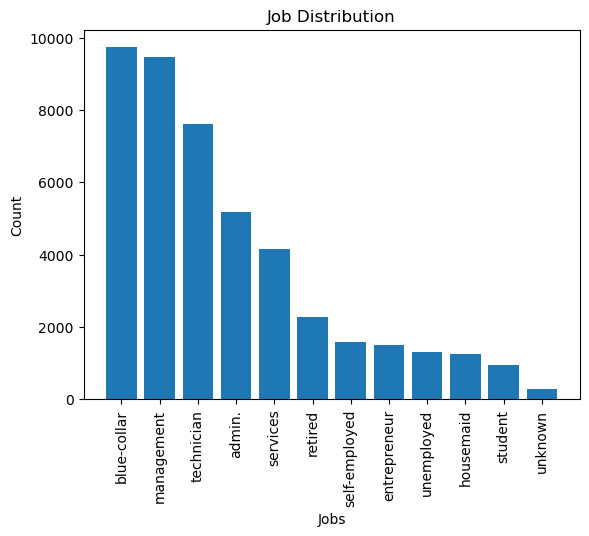

In [12]:
# Get the count of each job in the Job column
counts = df["job"].value_counts()

# Plot the graph
plt.bar(counts.index, counts.values)
plt.xlabel("Jobs")
plt.ylabel("Count")
plt.title("Job Distribution")
plt.xticks(rotation=90)
plt.show()

The dataset is skewed towards specific job categories, with blue-collar,management, administrative, and technician roles being the most frequent. This knowledge can help the bank comprehend the makeup of their clientele and adjust thier marketing tactics appropriately.


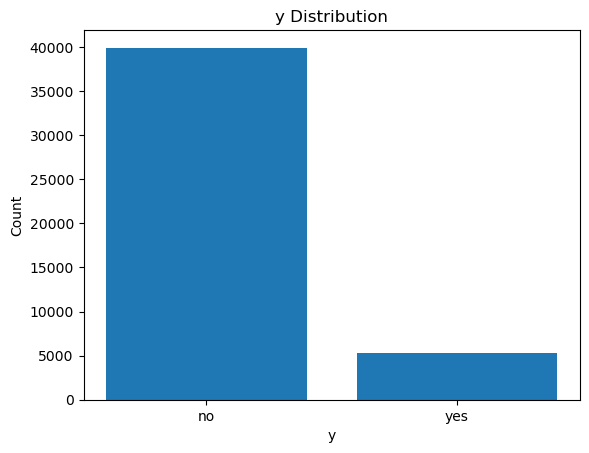

In [13]:
counts = df["subscribed"].value_counts()

# Plot the graph
plt.bar(counts.index, counts.values)
plt.xlabel("y")
plt.ylabel("Count")
plt.title("y Distribution")
plt.xticks
plt.show()

In [14]:
#Percentage of customers who subscribed to the term deposit
Subscribed_per = round(df['subscribed'].value_counts()['yes']*100/len(df),2)
Subscribed_per 

11.7

There is clear imblance between the subcription of term deposits. The majority of the customers have not subscribed. However, there is still 11.7 percent of customes who subscribed and realistically this is a good conversion rate. 

In [15]:
#checking for the subscription in combonation with each job category

pd.crosstab(df.subscribed,df.job) 

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
subscribed,,,,,,,,,,,,
no,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254
yes,631,708,123,109,1301,516,187,369,269,840,202,34


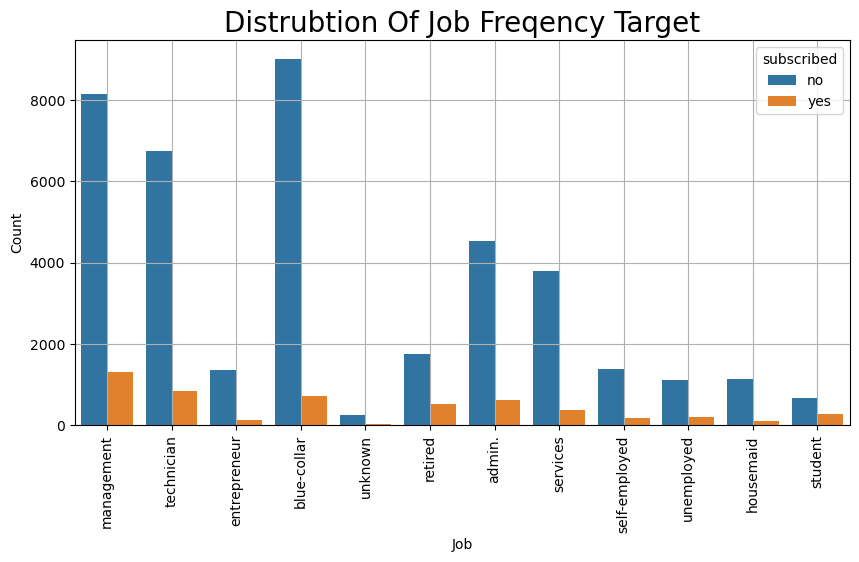

In [16]:
#plotting the cross tab for each job 

plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='subscribed',data=df)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Target',fontsize=20)
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Majority of the job categories do not subscribe to the term deposits, however, this imbalance is greater in management jobs, technicians and blue-collar jobs while it is lower in retired clients and students.

This insights can allow us to target clients with markeitng campaigns tailored to their job category

Similiarly , we can check further categorical variables like 'marital' to get further insights but we have left it out of the scope of this project.

## Correlation Matrix

C:\Users\mudas\AppData\Local\Temp\ipykernel_5364\1002762043.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


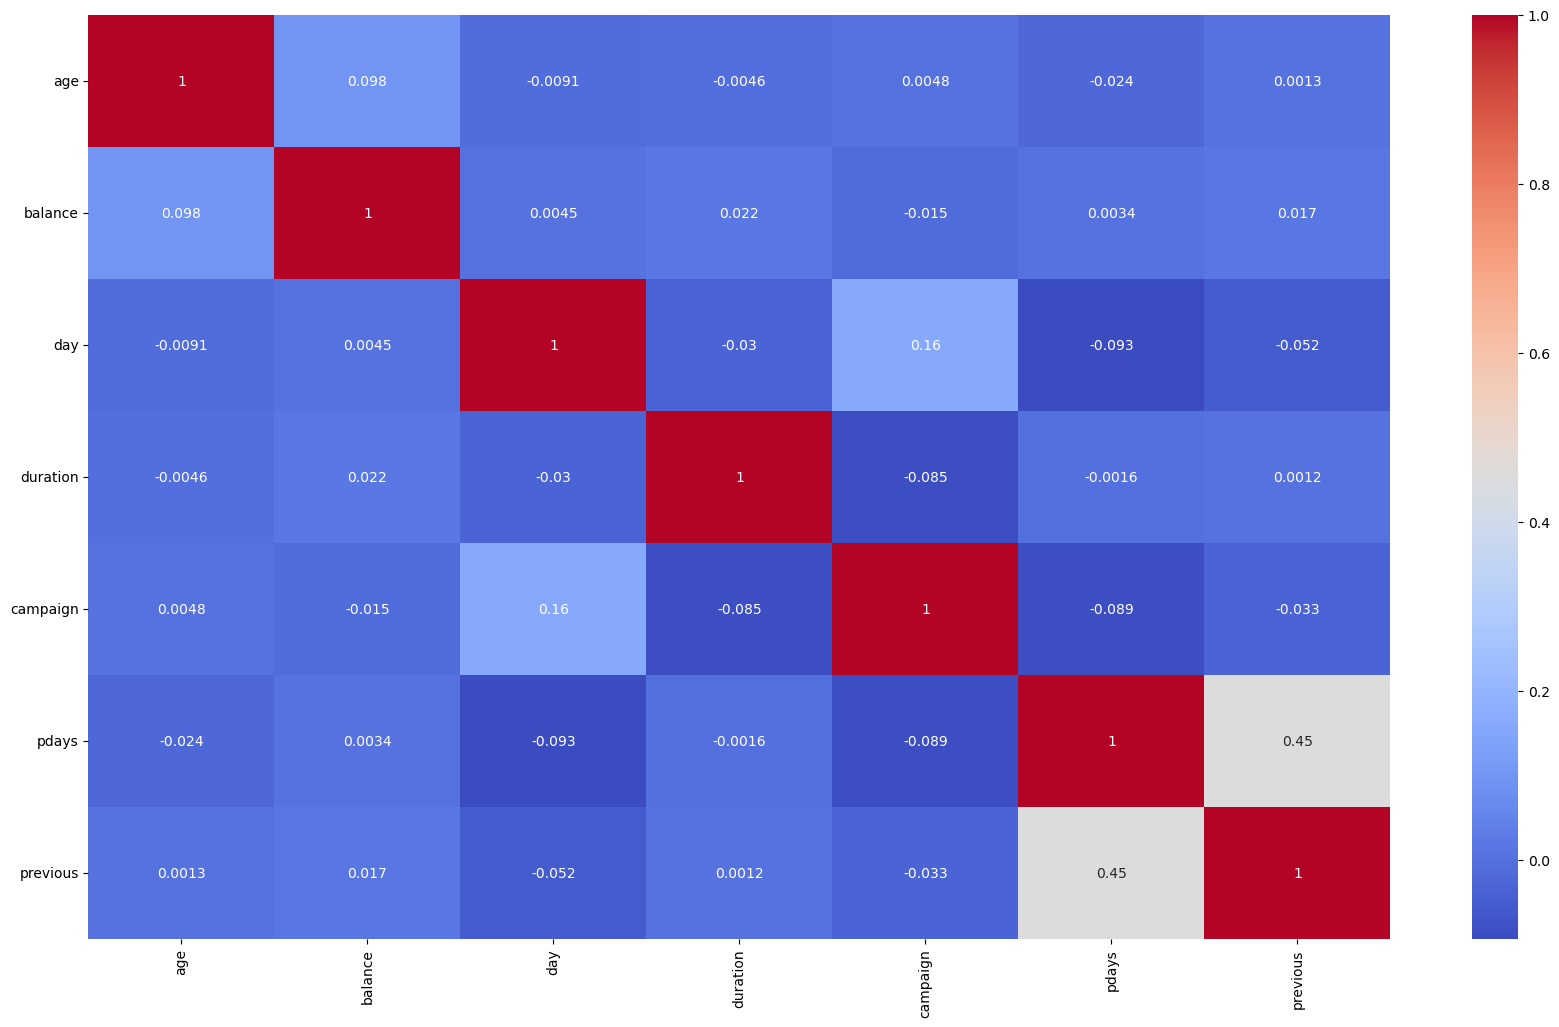

In [17]:
#Plotiing a correlation matrix to check for collinearity

sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(21,12)
plt.show()

No dicarded features based on the matrix above as there is no strong linear correlation bet any 2 variables

## Encoding the target variable 

We encode the target variable before feature engineering

In [18]:
#encoding the target variable 

from sklearn.preprocessing import LabelEncoder

# Target Variable Encoding
label = LabelEncoder()
df['subscribed'] = label.fit_transform(df['subscribed'])


## Feature Engineering

By initially separating the data, we can make sure that feature engineering is only based on the training data. This prevents data leaking, and increases the validity and realism of the model evaluation.

In [19]:
#dropping the target variable 

X = df.iloc[:,:16] 
y = df.iloc[:,-1]

In [20]:
#creatign a training and test split 

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=374)

X_train.shape,y_train.shape,X_test.shape,y_test.shape



((36168, 16), (36168,), (9043, 16), (9043,))

### Handling Unknown Data in the Variables

In [21]:
len(df['poutcome'] == 'unknown') # number of unknown values in poutcome

45211

The poutcome variabel has significant amount of unknowns. 

SImiliarly, we check for unknown value proportion in all categorical variables 

In [22]:
# filter for only the categorical columns
cat_columns = df.select_dtypes(exclude=np.number).columns.tolist()

#looking the percentage of unknown values in the categorical columns
for column in df[cat_columns]:
    unknown_count = len(df[df[column] == 'unknown'])/len(df)*100
    print(f"{column}: {unknown_count:.2f}%")

job: 0.64%
marital: 0.00%
education: 4.11%
default: 0.00%
housing: 0.00%
loan: 0.00%
contact: 28.80%
month: 0.00%
poutcome: 81.75%


We can see that there is 81.75% of unknown data is poutcome. We are therefore going to drop this variable from the analyses.

Rest of the variables dont have as much unknown data so we will keep those. 

#### Note: since we are dropping this variable , we can no longer answer the business question :"Which of our past marketing campaigns were most effective, and what can we learn from them to improve future campaigns?" . Poutcome described the outcome of past marketing campaigns. Hence, we removed this question from our analyses

In [23]:
# Dropping Poutcome variable
X_train.drop(['poutcome'],axis=1,inplace=True)
X_test.drop(['poutcome'],axis=1,inplace=True)

### Handling Outliers

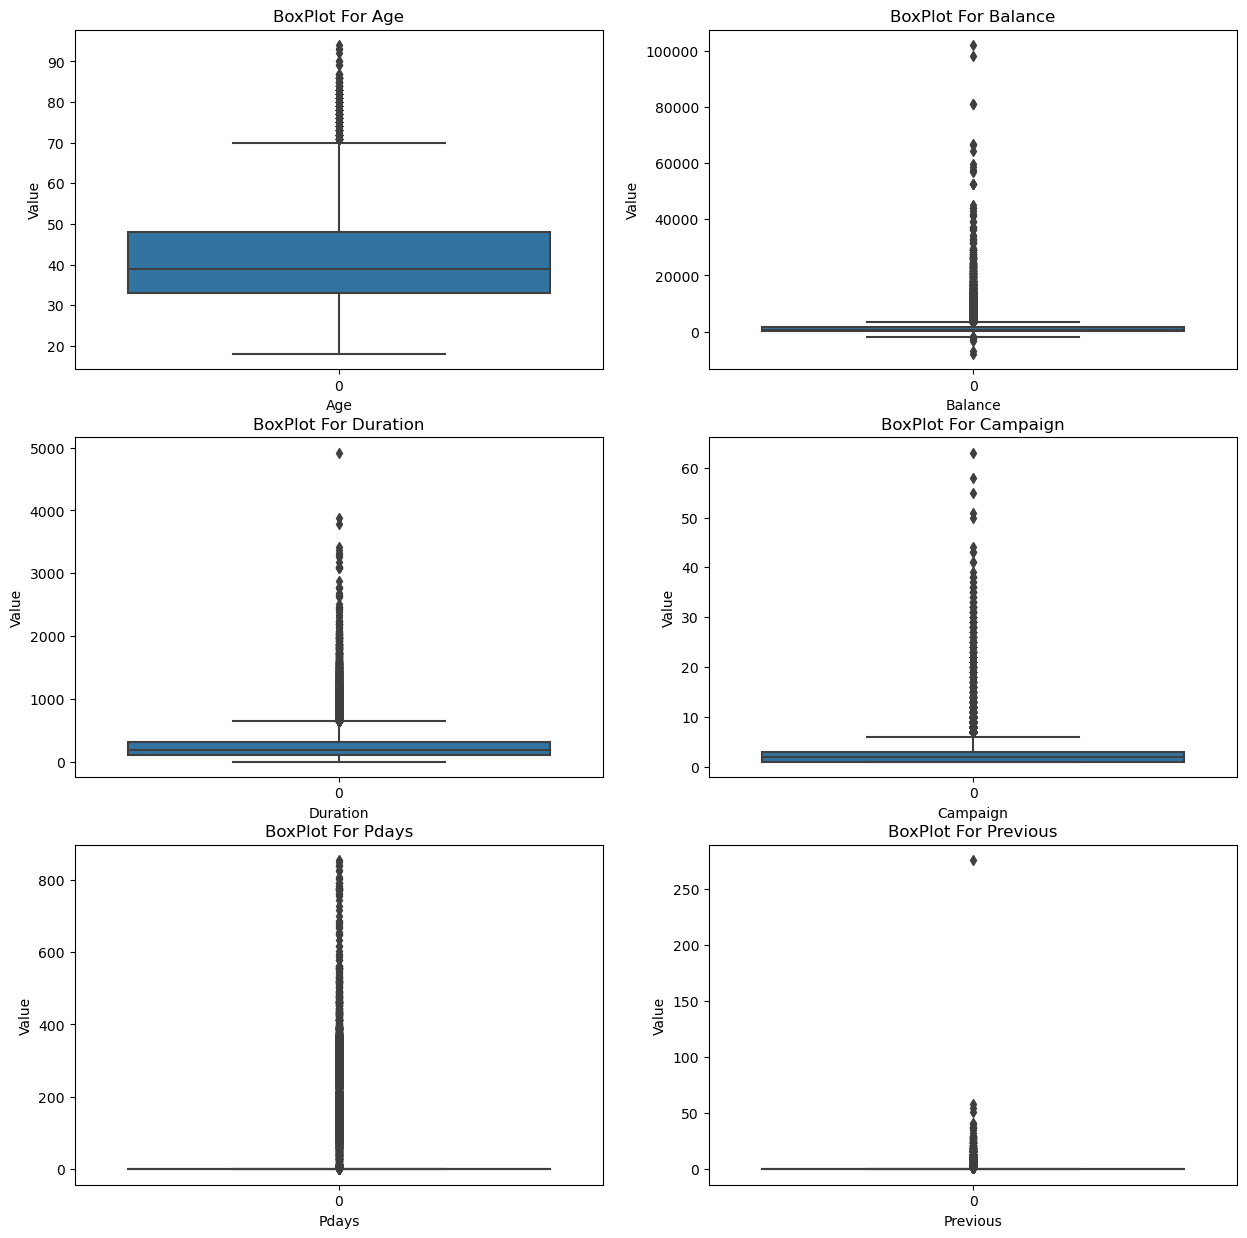

In [24]:
# Create boxplots for the numerical columns  to check for ouliers

col=['age','balance','duration','campaign','pdays','previous']
plt.figure(figsize=(15,15))

for i,x in enumerate(col):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=X_train[x])
    plt.title(f'BoxPlot For {x[0].upper()+x[1:]}')
    plt.xlabel(f'{x[0].upper()+x[1:]}')
    plt.ylabel('Value')

#### Scaling the variables with Robust Scaler 

RobustScaler scales the data based on the median and the interquartile range (IQR). It is designed to be more robust against outliers than Standard Scaler which uses  mean and standard deviation. It is less sensitive to outliers.

We are not dropping the ouliers based of percentile method as that would amount to huge data loss


In [25]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

col=['age','balance','duration','campaign','pdays','previous']

X_train[col] = scaler.fit_transform(X_train[col]) 
X_test[col] = scaler.transform(X_test[col]) 


## Encoding categorical input variables 

Using pandas method for encoding as the variables seem to be nominal. 
Not using label encoder as it more suitable for ordinal variables.

In [26]:
X_train.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month'],
      dtype='object')

In [27]:
obj = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month']
X_train = pd.get_dummies(X_train,columns=obj)
X_test = pd.get_dummies(X_test,columns=obj)

In [28]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
4510,-0.133333,3.676254,20,2.750000,-0.5,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32422,-0.533333,2.957227,16,0.208333,-0.5,147.0,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3905,0.533333,0.287611,16,-0.203704,-0.5,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
157,1.400000,-0.170354,5,0.268519,-0.5,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1427,1.400000,-0.329646,8,-0.476852,-0.5,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12022,1.200000,-0.096608,20,-0.796296,2.5,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
35880,0.000000,0.513274,8,-0.421296,2.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14420,0.000000,0.457965,14,0.157407,0.5,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25895,-0.600000,1.350295,19,-0.615741,-0.5,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Building Models

### Logistic Regression Model with GridSearch

In [34]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [39]:
from sklearn.linear_model import LogisticRegression

#Define the hyperparameter grid
param_grid = {
    'penalty': ['l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'max_iter': [50000,100000]
}

# Create the Logistic Regression model
log_model = LogisticRegression(random_state= 374)

# Create the GridSearchCV object with cross-validation
bestlogmodel= GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to my data
bestlogmodel.fit(X_train.values, y_train.values)  


# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", bestlogmodel.best_params_)
print('Best accuracy:', bestlogmodel.best_score_)

Best Hyperparameters: {'C': 10, 'max_iter': 50000, 'penalty': 'l2'}
Best accuracy: 0.8954325054800402


In [42]:
y_pred1 = bestlogmodel.predict(X_test.values)
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred1):.3f}")
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred1):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred1):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred1):.3f}")
print("***********************")


***********************
Accuracy Score:   0.892
***********************
Recall Score:     0.254
Precision Score:  0.599
F1 Score:         0.357
***********************


#### ROC-AUC Curve 

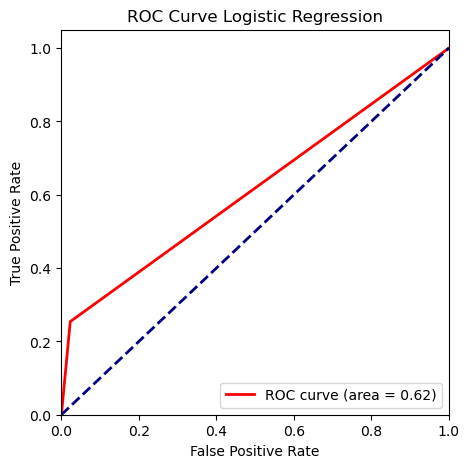

In [43]:

fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,y_pred1)

# compute roc auc
roc_auc1 = metrics.auc(fpr1, tpr1)

plt.figure(figsize=(5,5))
plt.plot(fpr1, tpr1, color='red', lw=2, label=f'ROC curve (area = {roc_auc1:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend(loc="lower right")



### KNN Classifier with GridSearch

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
knn = KNeighborsClassifier(random_state = 374)

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': list(range(1, 30)),
    
}

# Create a GridSearchCV object
knnbestmodel = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy',verbose=1,n_jobs=-1)

# Fit the GridSearchCV to your training data
knnbestmodel.fit(X_train.values, y_train.values)

# Get the best hyperparameters and accuracy
print("Best Hyperparameters:", knnbestmodel.best_params_)
print('Best accuracy:', knnbestmodel.best_score_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
Best Hyperparameters: {'n_neighbors': 17}
Best accuracy: 0.8934416494363664


In [40]:
y_pred2 = knnbestmodel.predict(X_test.values)
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred2):.3f}")
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred2):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred2):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred2):.3f}")
print("***********************")


***********************
Accuracy Score:   0.890
***********************
Recall Score:     0.236
Precision Score:  0.584
F1 Score:         0.336
***********************


#### ROC-AUC Curve 

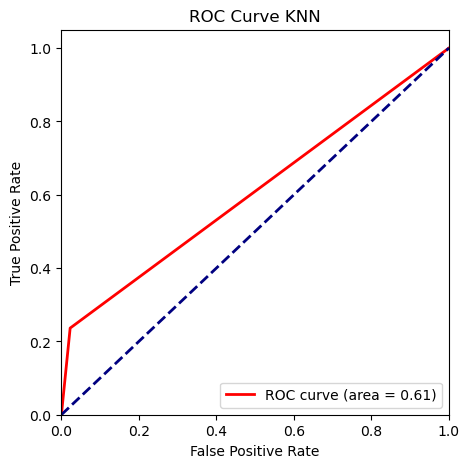

In [44]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test,y_pred2)

# compute roc auc
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.figure(figsize=(5,5))
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'ROC curve (area = {roc_auc2:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc="lower right")


### Decision Trees with RandomSearch

In [52]:
from sklearn.tree import DecisionTreeClassifier


In [53]:
dt= DecisionTreeClassifier(random_state=374)

# Create the random grid
param_grid_random = { 'criterion': ['gini', 'entropy', 'log_loss'],
                      'max_depth': [3,5,10,20,50,100],
                      'min_samples_split': [2,5,10,20,50,100],
                      'min_samples_leaf' : [1,5,10,50],
                      'max_leaf_nodes' : [2,20000,100],
                      'min_impurity_decrease' :[x for x in np.arange(0.0, 0.01, 0.0001).round(5)]
                     }

In [47]:
best_random_search_model = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=374), 
        scoring='accuracy', 
        param_distributions=param_grid_random,
        n_iter = 1000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
best_random_search_model = best_random_search_model.fit(X_train.values, y_train.values)
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)
print('Best accuracy:', best_random_search_model.best_score_)


Best parameters found:  {'min_samples_split': 10, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.0002, 'max_leaf_nodes': 20000, 'max_depth': 100, 'criterion': 'gini'}
Best accuracy: 0.8993864167121337


In [48]:
y_pred3 = best_random_search_model.predict(X_test.values)

print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred3):.3f}")
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred3):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred3):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred3):.3f}")
print("***********************")

***********************
Accuracy Score:   0.892
***********************
Recall Score:     0.431
Precision Score:  0.559
F1 Score:         0.487
***********************


#### ROC-AUC Curve

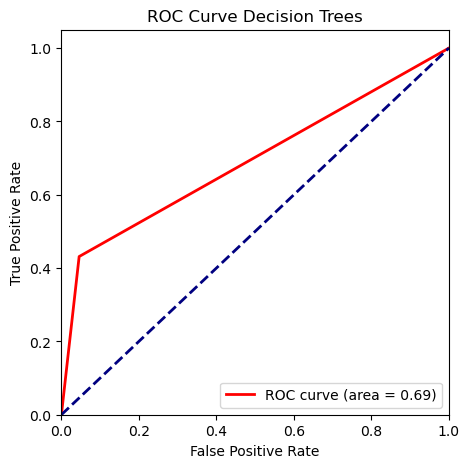

In [49]:
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test,y_pred3)

# compute roc auc
roc_auc3 = metrics.auc(fpr3, tpr3)

plt.figure(figsize=(5,5))
plt.plot(fpr3, tpr3, color='red', lw=2, label=f'ROC curve (area = {roc_auc3:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Trees')
plt.legend(loc="lower right")


What are the key factors influencing a client's decision to subscribe to a term deposit, and how can we optimize our marketing strategies to increase the subscription rate based on these insights?

In [50]:
dt_optimized = DecisionTreeClassifier(random_state=374, min_samples_split= 50, 
                                      min_samples_leaf= 10, min_impurity_decrease= 0.0002,
                                      max_leaf_nodes= 100, max_depth= 20, criterion='gini')

dt_optimized.fit(X_train.values,y_train.values)


DecisionTreeClassifier(max_depth=20, max_leaf_nodes=100,
                       min_impurity_decrease=0.0002, min_samples_leaf=10,
                       min_samples_split=50, random_state=374)

In [51]:
importances = dt_optimized.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances,axis=-1, kind=None, order=None)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")

Feature ranking:
1. duration (0.5520)
2. pdays (0.1196)
3. housing_yes (0.0986)
4. age (0.0390)
5. month_mar (0.0333)
6. contact_unknown (0.0274)
7. day (0.0217)
8. month_oct (0.0188)
9. housing_no (0.0167)
10. month_apr (0.0123)
11. month_jun (0.0120)
12. month_sep (0.0091)
13. loan_no (0.0090)
14. month_aug (0.0072)
15. month_nov (0.0055)
16. month_dec (0.0051)


The top 3 most important features that influence a client's decsion to a term depositas per decision trees are Call Duration , the number of days that passed after the client was last contacted from a previous (pdays) and whether the client has housing loan. 


The feature ranking you provided shows the importance of each feature in predicting whether a client will subscribe to a term deposit. Based on the feature importance scores generated by your Decision Tree Classifier, here's a brief interpretation of the most important features:

1. **Duration (0.5520)**: The most important feature according to your model is the duration of the last contact in seconds. Longer conversations with clients appear to have a significant influence on the decision to subscribe to a term deposit.

2. **Pdays (0.1196)**: The number of days that have passed since the client was last contacted from a previous campaign (with -1 indicating no previous contact) is the second most important feature.

3. **Housing (0.0986)**: Whether the client has a housing loan is also a highly influential factor. It's a binary feature, with values "yes" or "no."

4. **Age (0.0390)**: The age of the client is the fourth most important feature. Younger or older clients may have different subscription behaviors.

5. **Month (e.g., month_mar, month_oct)**: Several features related to the month of the last contact, such as March and October, are also important. This suggests that the timing of the contact can significantly impact the subscription decision.

6. **Contact (e.g., contact_unknown)**: The type of communication used for the last contact, particularly when it's "unknown," is another influential factor.

7. **Day (0.0217)**: The day of the month when the last contact was made is also somewhat important.

8. **Loan (e.g., loan_no)**: Whether the client has a personal loan is also a factor in the subscription decision.

9. **Previous (e.g., previous_outcome_success)**: The number of contacts performed before the current campaign and the outcome of the previous marketing campaign, especially when it was a success, influence the decision.

These feature importance scores help us understand which aspects of our data are most predictive of subscription decisions. We can use this information to focus on the most influential features when designing marketing campaigns or making business decisions.

##### For example we can focus on :

Targeting High-Impact Features:

Focus marketing efforts on clients with attributes that are highly ranked in feature importance, such as those with longer contact durations or clients who were last contacted in months with higher importance.The bank can also target those clients who have a housing loan to get a better term deposit conversion.

Segmentation:

Use client segmentation to tailor your marketing messages. For example, create different marketing strategies for younger clients and older clients based on the "Age" feature. You can also segment based on other highly-ranked features like "Housing" and "Loan."




### Random Forest with Randomsearch

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state= 374) 
rf_best_model = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_random,
    n_iter=1000,
    scoring='accuracy',
    cv=5,
    verbose=0, 
    n_jobs = -1
)
rf_best_model.fit(X_train, y_train)
print('Best parameters found: ', rf_best_model.best_params_)
print('Best accuracy:',rf_best_model.best_score_)



Best parameters found:  {'min_samples_split': 20, 'min_samples_leaf': 10, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 20000, 'max_depth': 20, 'criterion': 'log_loss'}
Best accuracy: 0.8955430637868759


In [67]:
y_pred4 = rf_best_model.predict(X_test.values)

print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred4):.3f}")
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred4):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred4):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred4):.3f}")
print("***********************")

***********************
Accuracy Score:   0.893
***********************
Recall Score:     0.205
Precision Score:  0.647
F1 Score:         0.312
***********************


C:\Users\mudas\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### ROC-AUC Curve 

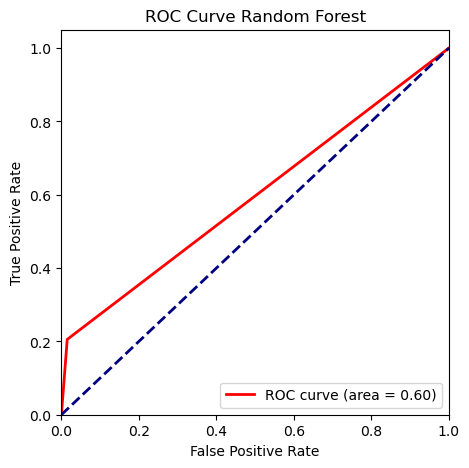

In [68]:
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test,y_pred4)

# compute roc auc
roc_auc4 = metrics.auc(fpr4, tpr4)

plt.figure(figsize=(5,5))
plt.plot(fpr4, tpr4, color='red', lw=2, label=f'ROC curve (area = {roc_auc4:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.legend(loc="lower right")


What are the key factors influencing a client's decision to subscribe to a term deposit, and how can we optimize our marketing strategies to increase the subscription rate based on these insights?

In [69]:
rf_optimized = RandomForestClassifier(random_state=374, min_samples_split= 100, 
                                      min_samples_leaf= 50, min_impurity_decrease= 0.0001,
                                      max_leaf_nodes= 20000, max_depth= 100, criterion='gini')

rf_optimized.fit(X_train.values,y_train.values)


RandomForestClassifier(max_depth=100, max_leaf_nodes=20000,
                       min_impurity_decrease=0.0001, min_samples_leaf=50,
                       min_samples_split=100, random_state=374)

In [70]:
importances = rf_optimized.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances,axis=-1, kind=None, order=None)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")

Feature ranking:
1. duration (0.4342)
2. pdays (0.0982)
3. age (0.0569)
4. previous (0.0551)
5. housing_no (0.0518)
6. housing_yes (0.0462)
7. contact_unknown (0.0264)
8. month_oct (0.0263)
9. contact_cellular (0.0260)
10. month_mar (0.0247)
11. month_sep (0.0165)
12. month_apr (0.0164)
13. balance (0.0156)
14. month_jun (0.0129)
15. day (0.0117)
16. month_aug (0.0105)


The most important features that influence a client's decsion to a term deposit as per Random forest are Call duration, pdays and age.

Based on the Decision Tree ranking previously , we can clearly conclude that call duration and pdays are the 2 most important features effecting the term deposit decion of the client. Thus, most marketig focus should be assigned to these to features.

### XG Boost with RandomSearch

In [60]:
import xgboost as xgb

clf = xgb.XGBClassifier(random_state=374)

param_grid = {
    'max_depth': [3,5,10,20],
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 500],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'min_child_weight': [1, 3],
    'reg_lambda': [0.1, 1],
    
}

best_xgb_model = RandomizedSearchCV(
    clf,
    param_distributions=param_grid,
    cv=5,
    scoring = 'accuracy'
)
best_xgb_model.fit(X_train.values,y_train.values)


print("Best Parameters:", best_xgb_model.best_params_)
print("Best Score:", best_xgb_model.best_score_)



Best Parameters: {'subsample': 0.9, 'reg_lambda': 1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best Score: 0.9065472962618992


In [61]:
y_pred5 =best_xgb_model.predict(X_test.values)

print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred5):.3f}")
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred5):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred5):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred5):.3f}")
print("***********************")

***********************
Accuracy Score:   0.904
***********************
Recall Score:     0.451
Precision Score:  0.632
F1 Score:         0.526
***********************


#### ROC-AUC Curve 

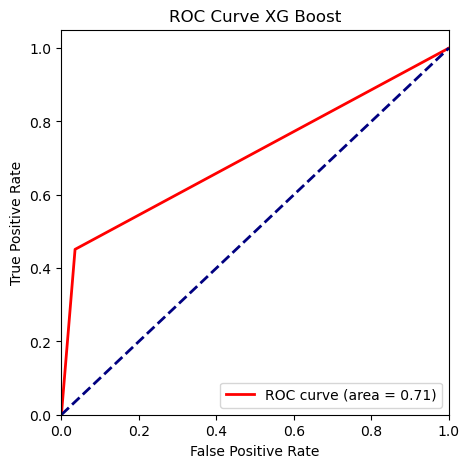

In [62]:
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_test,y_pred5)

# compute roc auc
roc_auc5 = metrics.auc(fpr5, tpr5)

plt.figure(figsize=(5,5))
plt.plot(fpr5, tpr5, color='red', lw=2, label=f'ROC curve (area = {roc_auc5:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XG Boost')
plt.legend(loc="lower right")

## Performance comparison of all models 

In [71]:

# Calculate the accuracy, recall, precision, and F1 score for each model
accuracy1 = accuracy_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1)
roc_auc1 = metrics.auc(fpr1, tpr1)

accuracy2 = accuracy_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
f1_score2 = f1_score(y_test, y_pred2)
roc_auc2 = metrics.auc(fpr2, tpr2)

accuracy3 = accuracy_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
f1_score3 = f1_score(y_test, y_pred3)
roc_auc3 = metrics.auc(fpr3, tpr3)

accuracy4 = accuracy_score(y_test, y_pred4)
recall4 = recall_score(y_test, y_pred4)
precision4 = precision_score(y_test, y_pred4)
f1_score4 = f1_score(y_test, y_pred4)
roc_auc4 = metrics.auc(fpr4, tpr4)

accuracy5 = accuracy_score(y_test, y_pred5)
recall5 = recall_score(y_test, y_pred5)
precision5 = precision_score(y_test, y_pred5)
f1_score5 = f1_score(y_test, y_pred5)
roc_auc5 = metrics.auc(fpr5, tpr5)



In [72]:

model = {
    'Model': ['Logistic Regression', 'KnnClassifier', 'Decision Trees', 'Random Forest','XG Boost'],
    'Accuracy': [accuracy1, accuracy2, accuracy3, accuracy4,accuracy5],
    'Recall': [recall1, recall2, recall3, recall4,recall5],
    'Precision': [precision1, precision2, precision3, precision4,precision5],
    'F1 Score': [f1_score1, f1_score2, f1_score3, f1_score4,f1_score5],
    'ROC-AUC Score': [roc_auc1,roc_auc2,roc_auc3,roc_auc4,roc_auc5]
}

# Create DataFrame
comparison = pd.DataFrame(model)

comparison


,Model,Accuracy,Recall,Precision,F1 Score,ROC-AUC Score
0,Logistic Regression,0.891518,0.253968,0.599119,0.356721,0.615569
1,KnnClassifier,0.889638,0.236228,0.584296,0.336436,0.606824
2,Decision Trees,0.892292,0.431373,0.558646,0.486828,0.692794
3,Random Forest,0.892624,0.205415,0.647059,0.311836,0.595181
4,XG Boost,0.903904,0.450980,0.632199,0.526431,0.707866


#### Model Overview:

##### Logistic Regression:

Accuracy: 89.15% - This model correctly predicts the outcome 89.15% of the time.
Recall: 25.40% - Of all the actual positive cases, it detects only 25.40% of them.
Precision: 59.91% - When this model predicts a positive case, it's correct 59.91% of the time.
F1 Score: 35.67% - This is the harmonic mean of Precision and Recall and is relatively low, indicating a potential imbalance between Precision and Recall.
ROC-AUC Score: 61.56% - Indicates a modest ability of the model to distinguish between positive and negative classes.

##### KnnClassifier:

Accuracy is slightly lower than Logistic Regression, but the F1 Score is slightly lesser. The model seems to perform similarly to the Logistic Regression model in this context but with slightly higher precision.

##### Decision Trees:

Has similar accuracy to the other models but boasts the highest Recall. This might be preferred if the bank wants to capture a larger proportion of actual positive cases, even if it means more false positives.

##### Random Forest:

Has a high accuracy of 89.2% and a highest precision among all the models. This model predicts the most correct positive cases so it might be useful if the bank is trying to maximise the subscriptions.

##### XG Boost:

This model has the highest accuracy of 90.34%. It also has reasonable Recall and Precision values, leading to an F1 Score of 50.95% and a decent ROC-AUC score of 70%

## Conclusion:

Since , we have an imbalanced data set, its important to check across all scores and not just accuracy. It is especially important to look at F1 and roc scores in this case.

Each model has advantages and disadvantages but XG boost performs the best over all other models over all. 

In a marketing effort when identifying potential clients is crucial, XG BOOST model may be more desired as it is better at catching potential subscribers.

The particular objectives of bank's marketing strategy should guide thier decision when selecting one of these models. It seems like XG Boost is a superior option if getting more subscribers is thier top priority.

XG Boost's ROC-AUC score of 0.70 suggests that the model does a good job of differentiating between the positive and negative classes. It implies that not only is the model really accurate but is it also good at making the distinctions. 


## Overview for the bank

##### The bank's primary goal is likely to maximize subscriptions to term deposits. Depending on the bank's strategy, different metrics may be more relevant:

If the bank wants to ensure they reach as many potential subscribers as possible (even at the risk of targeting some who won't subscribe), they might prioritize models with high Recall.

If the bank wants to ensure that their marketing or outreach efforts are more precise and cost-effective (targeting only those most likely to subscribe), they might prioritize Precision (like in Random Forest).

XG Boost appears to be the best-balanced model with the highest accuracy, and decent Recall and Precision. This might be the bank's best option for a well-rounded approach.

The bank should also consider the costs associated with false positives (clients incorrectly predicted to subscribe) and false negatives (potential subscribers the model misses). Balancing these costs will help in choosing the most economically beneficial model.

Our recommendation would be to use XG boost model as the F1 score of 50.9% is balancing the costs and a descent ROC score suggests a robust classification.